## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
path = r'C:\Users\Barb\19-09-2024 Gun Violence Data'

In [9]:
#Import the gun violence data from 6-3

df_gun = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-3.csv'), index_col = 0)

In [11]:
df_gun.shape

(239677, 9)

In [13]:
df_gun.head()

,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_gender
0,2013-01-01,Pennsylvania,0,4,NaN,NaN,1.0,0::20,0::Male||1::Male||3::Male||4::Female
1,2013-01-01,California,1,3,NaN,NaN,1.0,0::20,0::Male
2,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male
3,2013-01-05,Colorado,4,0,NaN,NaN,1.0,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male
4,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female


In [17]:
df_gun.dtypes

date                   object
state                  object
n_killed                int64
n_injured               int64
gun_stolen             object
gun_type               object
n_guns_involved       float64
participant_age        object
participant_gender     object
dtype: object

In [19]:
#Make the date "datetime" data type

In [21]:
df_gun['date'] = pd.to_datetime(df_gun['date'])

In [23]:
df_gun.dtypes

date                  datetime64[ns]
state                         object
n_killed                       int64
n_injured                      int64
gun_stolen                    object
gun_type                      object
n_guns_involved              float64
participant_age               object
participant_gender            object
dtype: object

In [25]:
#remove all categorical data

In [27]:
df_gun = df_gun.drop(columns=['date'], axis = 1)

In [29]:
df_gun = df_gun.drop(columns=['state','gun_stolen','gun_type','participant_age','participant_gender'], axis=1)

In [31]:
df_gun.dtypes

n_killed             int64
n_injured            int64
n_guns_involved    float64
dtype: object

### 2. The elbow technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [35]:
score = [kmeans[i].fit(df_gun).score(df_gun) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3269935.067905091,
 -1356765.0705776797,
 -748139.2608162251,
 -484935.5886287238,
 -395395.336284758,
 -329633.9610941395,
 -248654.94979587966,
 -207386.30894888396,
 -197615.2899378168]

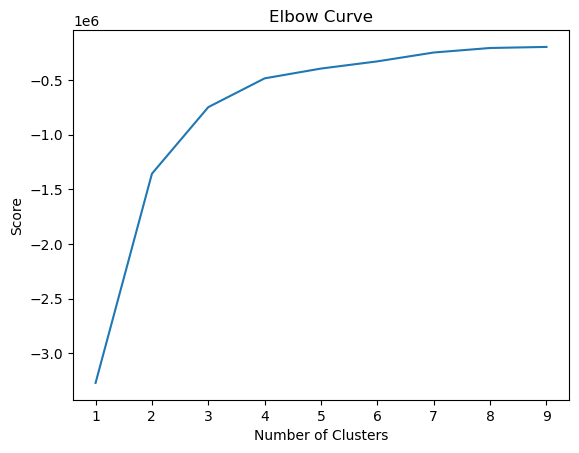

In [37]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from one to two on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is two.

### 3. k-means clustering

In [41]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [43]:
# Fit the k-means object to the data.

kmeans.fit(df_gun)

KMeans(n_clusters=2)

In [45]:
df_gun['clusters'] = kmeans.fit_predict(df_gun)

In [47]:
df_gun.head()

,n_killed,n_injured,n_guns_involved,clusters
0,0,4,1.0,0
1,1,3,1.0,0
2,1,3,2.0,0
3,4,0,1.0,0
4,2,2,2.0,0


In [49]:
df_gun['clusters'].value_counts()

clusters
0    239647
1        30
Name: count, dtype: int64

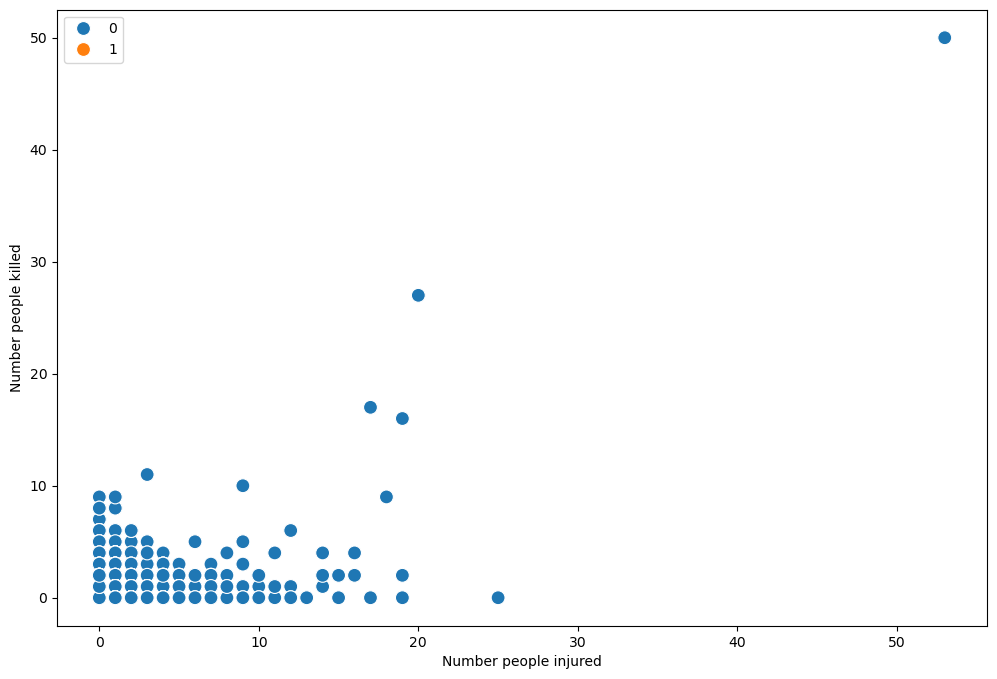

In [53]:
# Plot the clusters for the "n_killed" and "n_injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gun['n_injured'], y=df_gun['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number people injured') # Label x-axis.
plt.ylabel('Number people killed') # Label y-axis.
plt.show()

##### This scatterplot does not make much sense since only 1 cluster is showing.

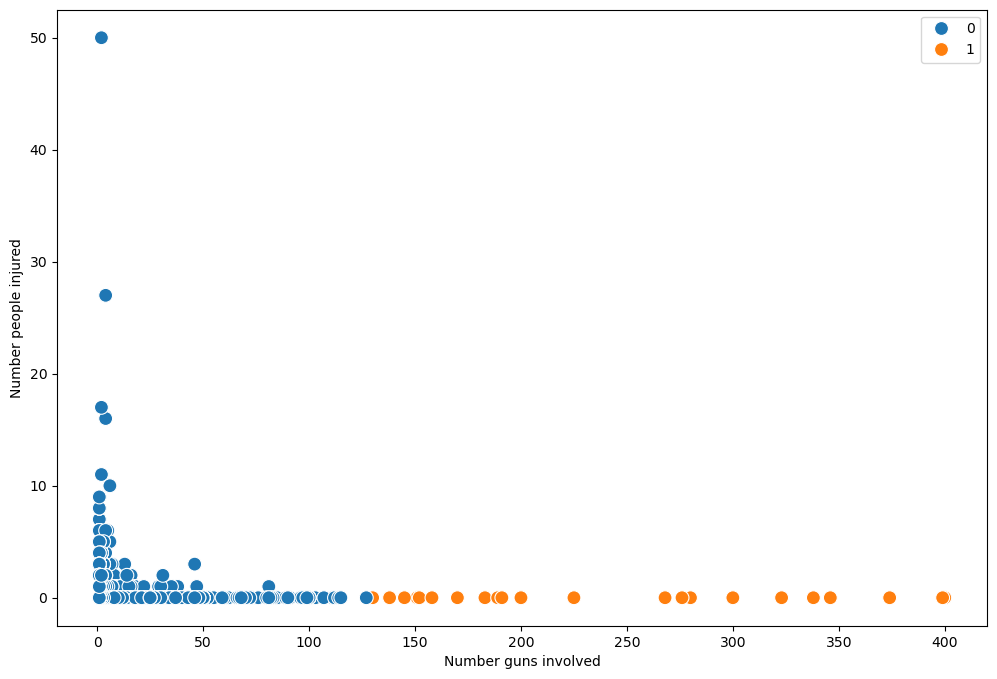

In [58]:
# Plot the clusters for the "n_guns_involved" and "n_killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gun['n_guns_involved'], y=df_gun['n_killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number guns involved') 
plt.ylabel('Number people injured') 
plt.show()

##### The scatterplot shows that fewer people were injured when more guns were involved in gun violence. This doesn't make sense, though.

In [72]:
df_gun.loc[df_gun['clusters'] == 1, 'cluster'] = 'orange'
df_gun.loc[df_gun['clusters'] == 0, 'cluster'] = 'blue'

In [74]:
df_gun.groupby('cluster').agg({'n_guns_involved':['mean', 'median'], 
                         'n_injured':['mean', 'median'],
                          'n_killed':['mean', 'median']})

n_guns_involved        n_injured         n_killed       
                   mean median      mean median      mean median
cluster                                                         
blue           1.186291    1.0  0.494068    0.0  0.252321    0.0
orange       253.733333  246.5  0.000000    0.0  0.000000    0.0

In [77]:
##### With these results, one could further analyze why so many guns were used at times. Maybe the more guns involved, the greater the threat that the
##### guns posed. So, the guns were not fired as often because the victim was less likely to resist.